In [450]:
import pandas as pd
from matplotlib import pyplot as plt
import random
import numpy as np
import math
import importlib
import mcmc_functions
importlib.reload(mcmc_functions)

from mcmc_functions import *
import importlib

seasons_missing_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/premier-league-matches.csv')
tables_df = pd.read_csv('/Users/josephsun/Desktop/M4R/code/pl-tables-1993-2024.csv')
recent_df = pd.read_csv('matches.csv')
recent_df = recent_df[recent_df['Venue'] == 'Home']



In [451]:
converted_recent_df = convert_match_data(recent_df)
converted_recent_df = converted_recent_df.sort_values(by='Wk').reset_index(drop=True)

seasons_df = pd.concat([seasons_missing_df, converted_recent_df], ignore_index=True)


In [452]:

recent = seasons_df[seasons_df['Season_End_Year'] == 2023] #2023 season
recent_previous = seasons_df[seasons_df['Season_End_Year'] == 2022]
initial_season = seasons_df[seasons_df['Season_End_Year'] == 1993]


"""" 
Schema: 
Season_End_Year
Wk
Date
Home
HomeGoals
AwayGoals
Away
FTR
"""

'" \nSchema: \nSeason_End_Year\nWk\nDate\nHome\nHomeGoals\nAwayGoals\nAway\nFTR\n'

In [453]:
seasons_df

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12401,2024,38,2024-05-19,Liverpool,2,0,Wolves,H
12402,2024,38,2024-05-19,Arsenal,2,1,Everton,H
12403,2024,38,2024-05-19,ManchesterCity,3,1,West Ham,H
12404,2024,38,2024-05-19,Burnley,1,2,Nott'ham Forest,A


In [461]:
strength_dict, parameters, acceptance_counters, tracked_parameters, strength_dict_original = (
mcmc(seasons_df, 2017, 2021, burn_in = 10000, iterations = 90000))

In [462]:
acceptance_counters

{'Strength': {'accepted': 52362, 'total': 71825},
 'Home Advantage': {'accepted': 240,
  'total': 4477,
  'percentage': 5.360732633459906},
 'Away Advantage': {'accepted': 166,
  'total': 4545,
  'percentage': 3.6523652365236527},
 'Mu_P': {'accepted': 243, 'total': 4569, 'percentage': 5.318450426789232},
 'Sigma_P': {'accepted': 243, 'total': 4569, 'percentage': 5.318450426789232},
 'Eta': {'accepted': 197, 'total': 4584, 'percentage': 4.297556719022688},
 'Sigma_S': {'accepted': 197, 'total': 4584, 'percentage': 4.297556719022688}}

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  


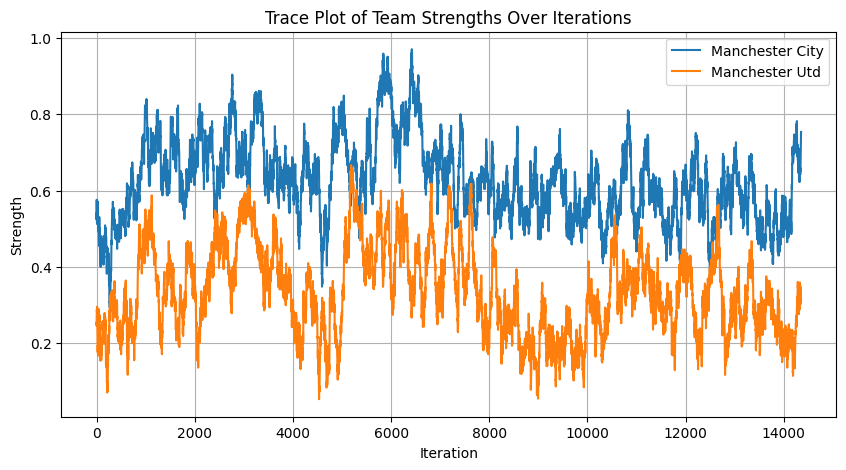

In [463]:
trace_plot_strength(strength_dict, ['Manchester City', 'Manchester Utd'], 2018)

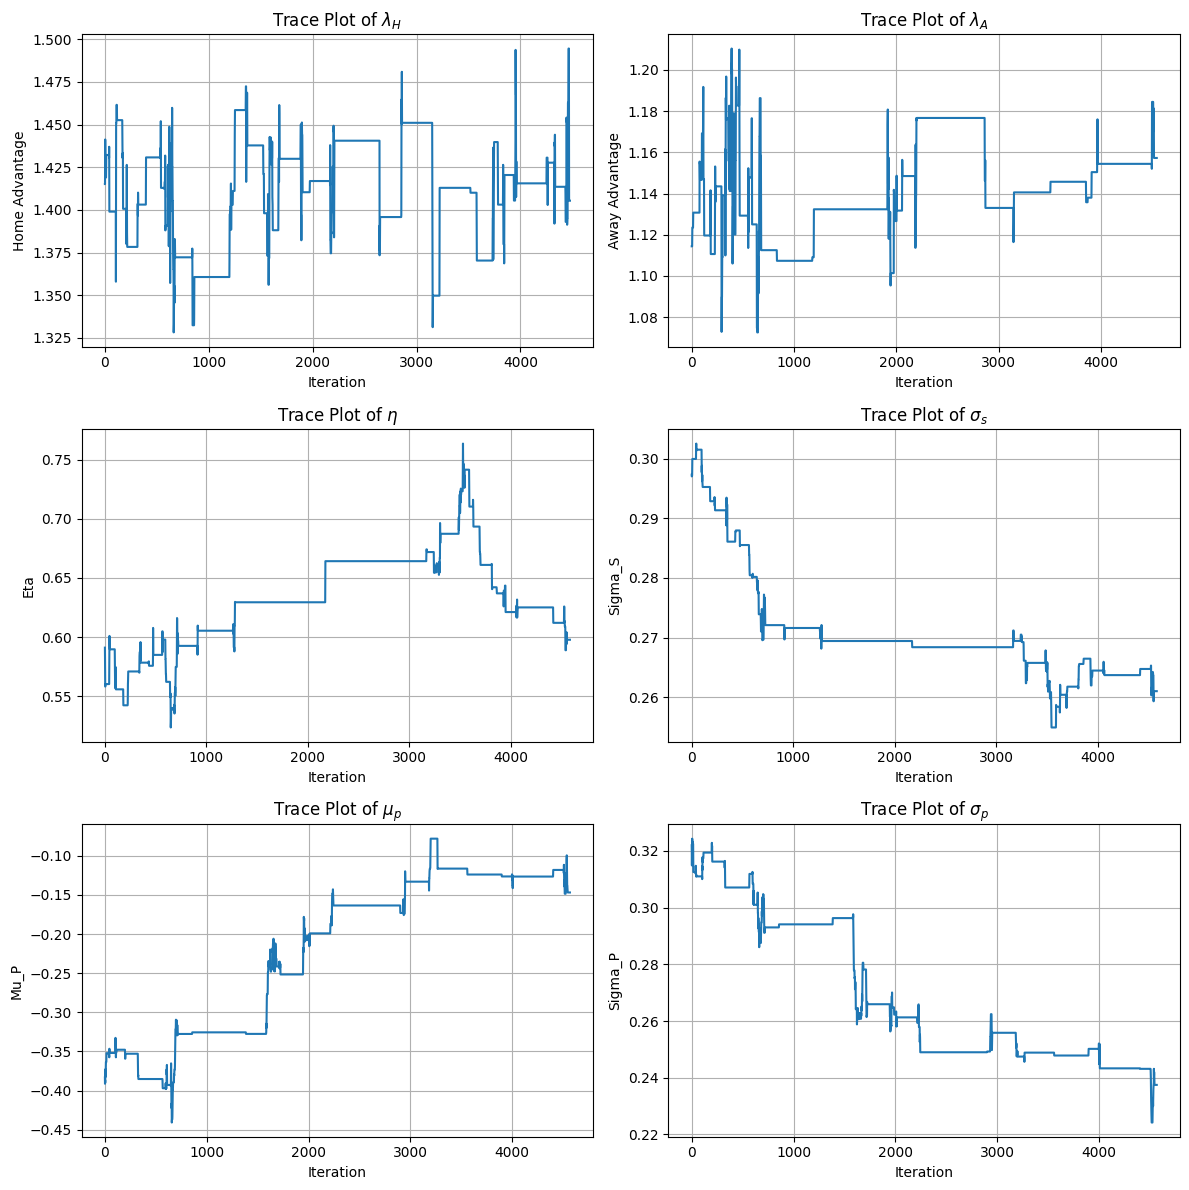

In [464]:
#note, can try plotting global parameters with adjusted timescale with trace_plot_parameter(tracked_parameters[year])
trace_plot_parameter(parameters)


/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  


Manchester City's strength was greater than Manchester Utd's strength in 99.43557940213226% of the iterations


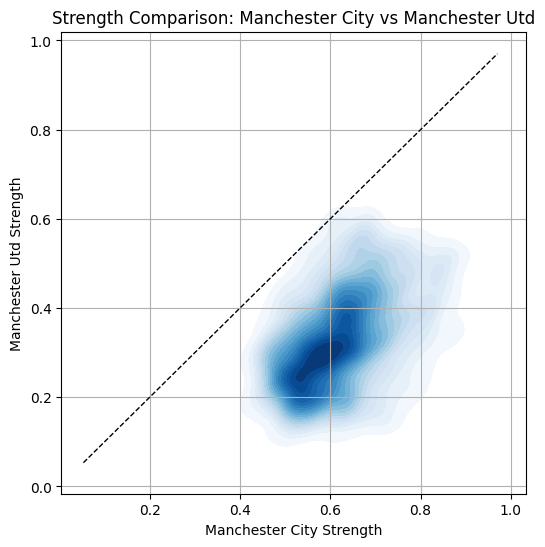

In [465]:
#comparison_plot(strength_histories_one, 'Leicester', 'Arsenal')
comparison_plot(strength_dict, 'Manchester City', 'Manchester Utd', 2018)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  


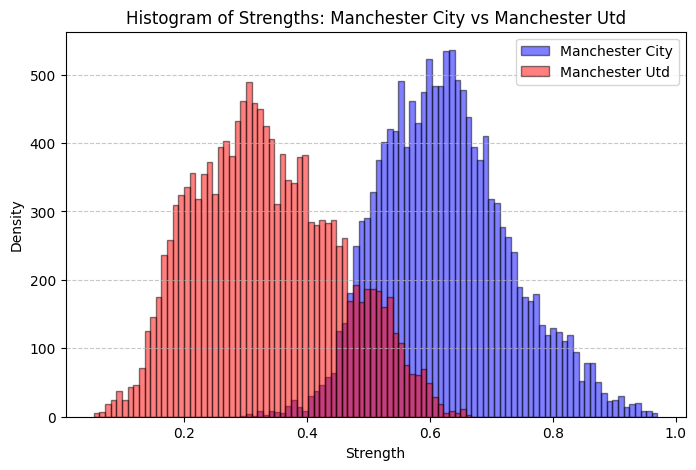

In [466]:
strength_histogram(strength_dict, 'Manchester City', 'Manchester Utd', 2018, bins = 100)


/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  


Effective Sample Size for Manchester Utd: 48.16 out of 14351


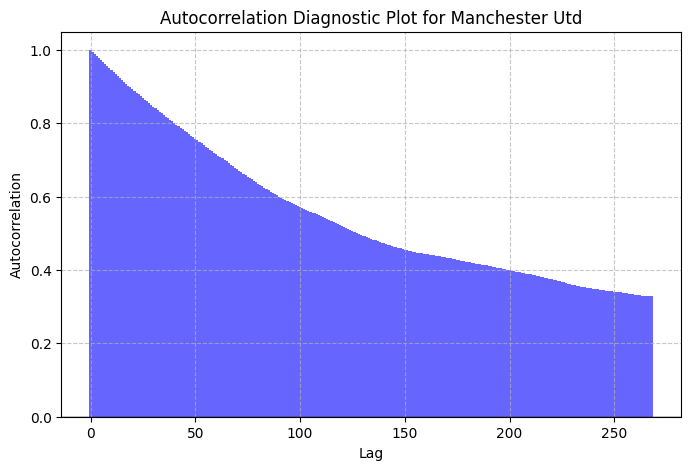

[np.float64(1.0),
 np.float64(0.9944847926970829),
 np.float64(0.9888068575036862),
 np.float64(0.9831701170044497),
 np.float64(0.9776101422861918),
 np.float64(0.9719935367462212),
 np.float64(0.9663214030864394),
 np.float64(0.9607839851972189),
 np.float64(0.9552277856910528),
 np.float64(0.9498318106412424),
 np.float64(0.9443501603445704),
 np.float64(0.9390376094882883),
 np.float64(0.9336338560235197),
 np.float64(0.9282405315875284),
 np.float64(0.9231237416366925),
 np.float64(0.9178960477213147),
 np.float64(0.9127361375319991),
 np.float64(0.9077668889731635),
 np.float64(0.9028019090211753),
 np.float64(0.8978808838067492),
 np.float64(0.8929727729950936),
 np.float64(0.8881296507398979),
 np.float64(0.8834293007047077),
 np.float64(0.8787907905447228),
 np.float64(0.8740248995914089),
 np.float64(0.8692432842129052),
 np.float64(0.864590326538528),
 np.float64(0.8599110134199698),
 np.float64(0.8553250296451653),
 np.float64(0.8507056153453255),
 np.float64(0.846048589656

In [467]:
autocorrelation_plot(strength_dict, 'Manchester Utd', 2018)

In [204]:
for key in parameters:
    print(key)

Home Advantage
Away Advantage
Eta
Sigma_S
Mu_P
Sigma_P


In [491]:
def sample_season(new_season, strength_dict, year, parameters):
    import random
    parameter_names = ['Home Advantage', 'Away Advantage', 'Eta', 'Sigma_S', 'Mu_P', 'Sigma_P']
    parameter_dict = {}
    strengths = random.choice(strength_dict[year])
    teams = sorted(new_season['Home'][:100].unique())

    for name in parameter_names:
        parameter_dict[name] = random.choice(parameters[name])

    strength_season, strength_df = sample_prior_strengths(
        new_season, strengths, teams, 
        mu_p=parameter_dict['Mu_P'], sigma_p=parameter_dict['Sigma_P'],
        eta=parameter_dict['Eta'], sigma_s=parameter_dict['Sigma_S']
    )

    sampled_score = add_scores(strength_season, parameter_dict['Home Advantage'], parameter_dict['Away Advantage'])

    sampled_score[['HomeGoals', 'AwayGoals']] = pd.DataFrame(
        sampled_score['Sampled Score'].tolist(),
        index=sampled_score.index
    )

    sampled_score = sampled_score[['Season_End_Year', 'Wk', 'Date', 'Home', 'HomeGoals', 'AwayGoals', 'Away', 'FTR']]
    sampled_score = sampled_score.reset_index(drop=True)
    sampled_score.index += 1

    league_table = compute_league_table(sampled_score)
    league_table = league_table.reset_index(drop=True)
    league_table.insert(0, 'Position', league_table.index + 1)

    return sampled_score, league_table, strength_df


def simulate_league_outcomes(new_season, strength_dict, year, parameters, num_simulations=1000, truncate=False):
    from collections import defaultdict
    import pandas as pd

    position_counts = defaultdict(lambda: defaultdict(int))

    for _ in range(num_simulations):
        _, league_table, _ = sample_season(new_season, strength_dict, year, parameters)

        for _, row in league_table.iterrows():
            team = row['Team']
            pos = row['Position']
            position_counts[team][pos] += 1

    # Build full probability table
    teams = sorted(position_counts.keys())
    positions = sorted({pos for counts in position_counts.values() for pos in counts})
    
    prob_df = pd.DataFrame(index=teams, columns=positions)

    for team in teams:
        total = sum(position_counts[team].values())
        for pos in positions:
            prob = position_counts[team].get(pos, 0) / total
            prob_df.loc[team, pos] = round(prob, 4)

    # Apply truncation if specified
    if truncate:
        top_probs = prob_df.loc[:, :truncate].sum(axis=1)
        top_teams = top_probs.sort_values(ascending=False).head(truncate).index
        prob_df = prob_df.loc[top_teams, :truncate]

    prob_df.columns.name = "Final Position"
    prob_df.index.name = "Team"

    return prob_df


In [492]:
new_season = seasons_df[seasons_df['Season_End_Year'] == 2019]
sampled_score, league_table, strengths = sample_season(new_season, strength_dict, 2018, parameters)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:645: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)


In [493]:
strengths.sort_values('Strength')

,Team Name,Strength
2,Wolves,-0.440323
15,Newcastle Utd,-0.435164
8,Crystal Palace,-0.357957
10,Huddersfield,-0.349526
18,Watford,-0.306084
5,Brighton,-0.071980
11,Leicester City,-0.008347
0,Cardiff City,0.031156
4,Bournemouth,0.052210
16,Southampton,0.066380


In [494]:
sampled_score

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
1,2019,1,2018-08-10,Manchester Utd,1,0,Leicester City,H
2,2019,1,2018-08-11,Newcastle Utd,1,4,Tottenham,A
3,2019,1,2018-08-11,Bournemouth,0,1,Cardiff City,H
4,2019,1,2018-08-11,Fulham,1,1,Crystal Palace,A
5,2019,1,2018-08-11,Huddersfield,1,1,Chelsea,A
...,...,...,...,...,...,...,...,...
376,2019,38,2019-05-12,Burnley,3,2,Arsenal,A
377,2019,38,2019-05-12,Watford,0,2,West Ham,A
378,2019,38,2019-05-12,Brighton,1,2,Manchester City,A
379,2019,38,2019-05-12,Leicester City,0,5,Chelsea,D


In [495]:
league_table

,Position,Team,MP,W,D,L,GF,GA,GD,PTS
0,1,Tottenham,38,29,5,4,96,30,66,92
1,2,Burnley,38,25,4,9,70,34,36,79
2,3,Liverpool,38,22,9,7,84,36,48,75
3,4,West Ham,38,23,5,10,83,37,46,74
4,5,Chelsea,38,23,5,10,76,37,39,74
5,6,Manchester Utd,38,20,10,8,68,45,23,70
6,7,Arsenal,38,19,8,11,58,35,23,65
7,8,Everton,38,19,8,11,52,39,13,65
8,9,Manchester City,38,17,11,10,59,35,24,62
9,10,Fulham,38,18,7,13,57,51,6,61


In [498]:
prob_df = simulate_league_outcomes(new_season, strength_dict, 2018, parameters, num_simulations = 1000, truncate = 8)

/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:645: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:645: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fillna(0)
/Users/josephsun/Desktop/M4R/code/mcmc_functions.py:645: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]).fi

In [497]:
prob_df

Final Position,1,2,3,4,5,6,7,8
Team,,,,,,,,
Manchester City,0.36,0.2,0.09,0.05,0.06,0.06,0.05,0.02
Manchester Utd,0.11,0.11,0.08,0.18,0.06,0.11,0.05,0.09
Liverpool,0.12,0.08,0.16,0.07,0.09,0.1,0.05,0.07
Tottenham,0.05,0.13,0.08,0.14,0.05,0.09,0.05,0.05
Chelsea,0.03,0.06,0.08,0.12,0.14,0.04,0.06,0.04
Arsenal,0.11,0.05,0.05,0.07,0.07,0.04,0.04,0.11
Leicester City,0.02,0.04,0.07,0.06,0.02,0.06,0.06,0.04
Newcastle Utd,0.02,0.02,0.03,0.09,0.03,0.06,0.06,0.03


In [490]:
print(prob_df.to_latex(escape = False))

\begin{tabular}{lllllllllllllllllllll}
\toprule
Final Position & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 & 19 & 20 \\
Team &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
Arsenal & 0.050000 & 0.100000 & 0.060000 & 0.050000 & 0.060000 & 0.130000 & 0.090000 & 0.090000 & 0.080000 & 0.050000 & 0.050000 & 0.080000 & 0.020000 & 0.010000 & 0.020000 & 0.030000 & 0.010000 & 0.010000 & 0.000000 & 0.010000 \\
Bournemouth & 0.000000 & 0.010000 & 0.030000 & 0.030000 & 0.020000 & 0.060000 & 0.080000 & 0.020000 & 0.070000 & 0.050000 & 0.040000 & 0.090000 & 0.110000 & 0.090000 & 0.060000 & 0.040000 & 0.030000 & 0.070000 & 0.050000 & 0.050000 \\
Brighton & 0.020000 & 0.030000 & 0.030000 & 0.010000 & 0.070000 & 0.000000 & 0.010000 & 0.060000 & 0.080000 & 0.090000 & 0.070000 & 0.030000 & 0.050000 & 0.030000 & 0.050000 & 0.080000 & 0.080000 & 0.030000 & 0.080000 & 0.100000 \\
Burnley & 0.010000 & 0.040000 & 0.020000 & 0.050000 & 0.070000 & 0.0